**From image to speech**

In [11]:
import sys
# update the pip package installer
!{sys.executable} -m pip install --upgrade --user pip
# install required packages
!{sys.executable} -m pip install --upgrade --user awkward vector numpy matplotlib pytesseract opencv-python imutils gtts

In [12]:
import cv2
import pytesseract

In [13]:
# Grayscale, Gaussian blur, Otsu's threshold
#image = cv2.imread('20221124_111425.jpg')
image = cv2.imread('testocr.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [14]:
# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

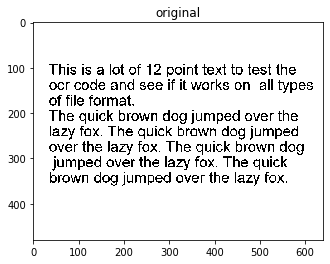

In [15]:
## This is an optional cell
from matplotlib import pyplot as plt
def displayColorImage(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation="nearest")
    plt.title(title)
    plt.show()
    
displayColorImage(image, "original")

In [16]:
# Perform text extraction
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
print(data)

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of fil farmat

The quick brown dog jumped over the
lazy fox. The quick brown dog jurnped
over the lazy fox. The quick brawn dog
jumped aver the lazy fox. The quick
brown dog jumped over the lazy fox.



In [8]:
from gtts import gTTS
import subprocess
import os

In [9]:
class Text2Speech:
    def text2speech(self, text: str, language: str = "en"):
        """Get a string and returns a saved audio file where the string is read.
        Parameters
        ----------
        text : string, required
            The text to be read.
        Return
        ------
        audio : wav file.
            The file containing the read text.
        """
        tmp_file_name = "text_to_read.wav"
        audio = gTTS(text=text, lang=language, slow=False)
        audio.save(tmp_file_name)
        return_code = subprocess.call(["afplay", tmp_file_name])
        os.remove(tmp_file_name)

In [10]:
tts = Text2Speech()
#text = "I don't know what you are talking about"
tts.text2speech(data)